In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from model import Model
from dataloader import databunch_from_csv
from utils import threshold_predictions, check_acc, display_image
from fastai.vision import models, DatasetType
import constants
import pandas as pd
import numpy as np

In [3]:
label_file = 'train_tags_combined.csv'

## Loading previously saved model

In [4]:
data = databunch_from_csv(csv_name=label_file, path=constants.dataset_folder,
                          img_size=constants.initial_dimension, vertical_flip=False,
                          batch_size=constants.batch_size)
class_names = data.classes
learn = Model(threshold=0.5, databunch=data, arch=models.resnet50, load_model_name='cars_model_stage2')

## Testing

In [5]:
test_data = pd.read_csv('datasets/test_tags.csv')

In [6]:
test_items = ['{}/{}'.format(constants.dataset_folder, x) for x in test_data['image_name'].values]
test_labels = test_data['sep_tags'].values

In [7]:
data.add_test(test_items, test_labels)
preds, y = learn.learn.get_preds(ds_type=DatasetType.Test)
thresh_preds = threshold_predictions(preds, class_names, prediction_threshold=0.2)

In [8]:
print("Accuracy on test set: {:.2f} %".format(check_acc(test_labels, thresh_preds)*100))

Accuracy on test set: 63.84 %


## Qualitative Checking

Predicted: Chrysler Sebring_Convertible_2010 | Ground Truth: Chrysler Sebring_Convertible_2010


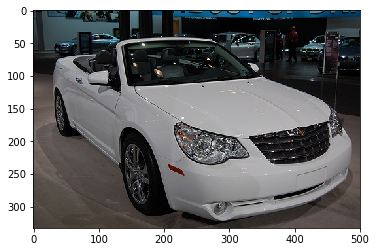

Predicted: Aston_Martin | Ground Truth: Aston_Martin V8_Vantage_Coupe_2012


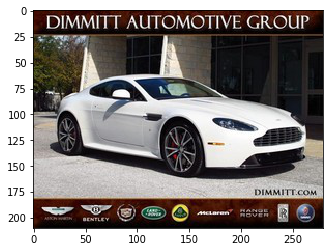

Predicted: Corolla_Sedan_2012 Toyota | Ground Truth: Toyota Corolla_Sedan_2012


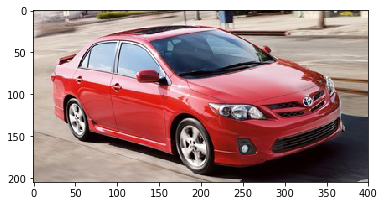

Predicted: Dodge Durango_SUV_2007 | Ground Truth: Dodge Durango_SUV_2007


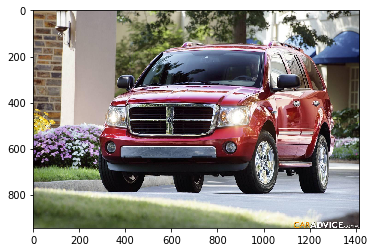

Predicted: BMW | Ground Truth: BMW 3_Series_Wagon_2012


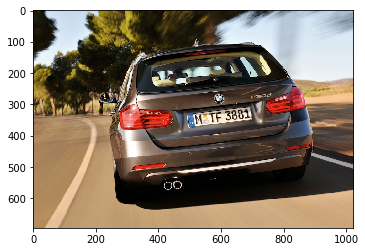

In [10]:
for i in np.arange(5):
    indx = np.random.randint(len(test_items))
    image_path = data.test_ds.items[indx]
    prediction = thresh_preds[indx]
    ground_truth = test_labels[indx]
    print("Predicted: {} | Ground Truth: {}".format(prediction, ground_truth))
    display_image(image_path)

As it can be seen, there are some predictions where the model is only able to predict the manufacturer of the vehicle correctly but not the model name or the model misses the model year but correctly predicts manufacturer name and model name. This model can be further improved with more data and it will behave more reasonably than that of the ordinary classification model in cases when the ground truth data itself has wrong annotations.